# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

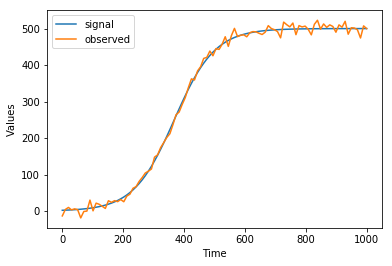

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [3]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

TypeError: __init__() takes 2 positional arguments but 3 were given

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z)
0     1       0:00.0 -inf        
0     2       0:00.0 -inf        
0     3       0:00.0 -inf        
0     4       0:00.0 -inf        
0     5       0:00.0 -inf        
0     21      0:00.0 -inf        
0     41      0:00.0 -inf        
0     61      0:00.0 -inf        
0     81      0:00.0 -inf        
0     101     0:00.0 -inf        
0     121     0:00.0 -inf        
0     141     0:00.0 -inf        
0     161     0:00.0 -inf        
0     181     0:00.0 -inf        
0     201     0:00.0 -inf        
0     221     0:00.0 -inf        
0     241     0:00.0 -inf        
0     261     0:00.0 -inf        
0     281     0:00.0 -inf        
0     301     0:00.0 -inf        
0     321     0:00.0 -inf        
0     341     0:00.0 -inf        
0     361     0:00.0 -inf        
0     381     0:00.0 -inf        
400

C:\Users\bclamber\Desktop\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


960   919     0:00.5 -940.8874627
980   944     0:00.5 -883.6949716
1000  983     0:00.5 -814.8592773
1020  1013    0:00.5 -778.8347787
1040  1034    0:00.6 -724.8278425
1060  1058    0:00.6 -687.6022152
1080  1098    0:00.6 -655.874992 
1100  1115    0:00.6 -630.2137725
1120  1137    0:00.7 -603.6784959
1140  1164    0:00.7 -571.8298693
1160  1177    0:00.7 -543.6709176
1180  1222    0:00.7 -520.6280585
1200  1257    0:00.7 -496.6284147
1220  1284    0:00.8 -476.8531175
1240  1312    0:00.8 -449.7651512
1260  1337    0:00.8 -426.6639484
1280  1370    0:00.8 -404.5843061
1300  1398    0:00.9 -376.0593782
1320  1420    0:00.9 -359.8536013
1340  1439    0:00.9 -343.8584738
1360  1468    0:00.9 -326.6156755
1380  1489    0:01.0 -313.3251444
1400  1515    0:01.0 -298.8803993
1420  1544    0:01.0 -284.525793 
1440  1571    0:01.0 -263.6700153
1460  1602    0:01.0 -248.3182736
1480  1638    0:01.1 -238.6435723
1500  1660    0:01.1 -224.0063617
1520  1684    0:01.1 -216.8633896
1540  1711    

5800  4496    0:05.0 -0.873626   
5820  4503    0:05.1 -0.83144    
5840  4511    0:05.1 -0.791157   
5860  4518    0:05.1 -0.752677   
5880  4529    0:05.1 -0.715887   
5900  4542    0:05.1 -0.680733   
5920  4554    0:05.2 -0.647156   
5940  4566    0:05.2 -0.615114519
5960  4577    0:05.2 -0.58457    
5980  4583    0:05.2 -0.555439   
6000  4600    0:05.2 -0.527605   
6020  4603    0:05.3 -0.50109    
Convergence obtained with Delta_z = -0.499797379189
Done!


## Plot posterior samples versus true parameter values (dashed lines)

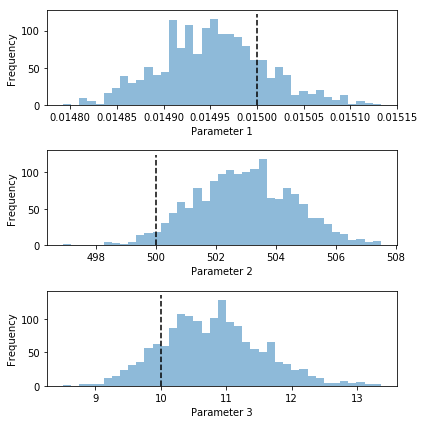

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

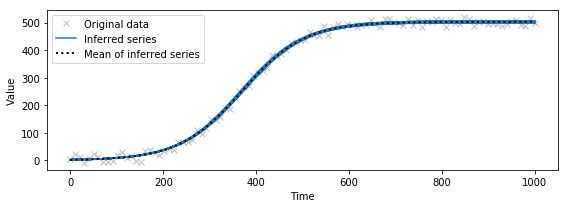

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -390.946564329 ± 0.0807329245902


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1587.48459658
